# House Sales in King County, USA
Home is a primary basic need, everyone needs a house for shelter every day. However, for those who have their needs met, some people use the money to invest. One of the investment instruments is property, especially houses. This dataset provides information on the number of bedrooms, bathrooms, conditions, views, building area, land area, basement area, and of course prices. The dataset can be found on [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction).


# Problems
Many people want to start investing but don't know where to invest. Property is one of them. But the question is, what kind of house is roughly compatible with the money owned by investors? Is asking a property agent a solution? Truth be told, real estate agents will only convince you to buy their wares. Not convincing you to invest. When it comes to investing, you need to know what specifications the market will be interested in. You don't buy just to be deposited, do you?

# Goals
Before you spend a lot of money on investing, you should consider the specifications first rather than listening to the empty sentences of real estate agents. High risk high return, but investing is about minimize risks to increase the chances of getting big returns constantly. We will make Machine Learning model to predict house prices so that at least we know the market price in circulation with specifications that match the price.

# 1) Preparation of Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install sidetable
import sidetable

import warnings
warnings.filterwarnings('ignore')

In [ ]:
house = pd.read_csv("/content/drive/My Drive/Datasets/kc_house_data.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#2) Explaination of Each Column

In [ ]:
desc = ["Unique ID for each home sold.",
        "Date of the home sale.",
        "Price of each home sold.",
        "Number of bedrooms.",
        "Number of bathrooms, where .5 accounts for a room with a toilet but no shower.",
        "Square footage of the apartments interior living space.",
        "Square footage of the land space.",
        "Number of floors.",
        "A dummy variable for whether the apartment was overlooking the waterfront or not.",
        "An index from 0 to 4 of how good the view of the property was.",
        "An index from 1 to 5 on the condition of the apartment.",
        "An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.",
        "The square footage of the interior housing space that is above ground level.",
        "The square footage of the interior housing space that is below ground level.",
        "The year the house was initially built.",
        "The year of the house's last renovation.",
        "What zipcode area the house is in.",
        "Latitude.",
        "Longitude.",
        "The square footage of interior housing living space for the nearest 15 neighbors.",
        "The square footage of the land lots of the nearest 15 neighbors"]

j = 0
data_desc = []
for column in house.columns:
  data_desc.append(
      [
       column,
       house[column].dtypes,
       house[column].isnull().sum(),
       round(house[column].isnull().sum()/len(house)*100, 2),
       house[column].nunique(),
       house[column].unique(),
       desc[j]
       ]
       )
  j += 1

column_desc = pd.DataFrame(data_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
print(f"Total column of this data set is: {len(house.columns)} columns.")

Total column of this data set is: 21 columns.


In [ ]:
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,id,int64,0,0.0,21436,"[7129300520, 6414100192, 5631500400, 248720087...",Unique ID for each home sold.
1,date,object,0,0.0,372,"[20141013T000000, 20141209T000000, 20150225T00...",Date of the home sale.
2,price,float64,0,0.0,4028,"[221900.0, 538000.0, 180000.0, 604000.0, 51000...",Price of each home sold.
3,bedrooms,int64,0,0.0,13,"[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]",Number of bedrooms.
4,bathrooms,float64,0,0.0,30,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7...","Number of bathrooms, where .5 accounts for a r..."
5,sqft_living,int64,0,0.0,1038,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060...",Square footage of the apartments interior livi...
6,sqft_lot,int64,0,0.0,9782,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ...",Square footage of the land space.
7,floors,float64,0,0.0,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]",Number of floors.
8,waterfront,int64,0,0.0,2,"[0, 1]",A dummy variable for whether the apartment was...
9,view,int64,0,0.0,5,"[0, 3, 4, 2, 1]",An index from 0 to 4 of how good the view of t...


# 3) Handling Missing Value

# 4) Datetime Dtype

In [ ]:
house['date'] = pd.to_datetime(house['date'])
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house['sold_day'] = house['date'].dt.day
house['sold_month'] = house['date'].dt.month
house['sold_year'] = house['date'].dt.year

house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_day,sold_month,sold_year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015


#6) Exploratory Data Analysis

## Univariate

In [ ]:
house.describe().T

# we see that:
    # average of house price is 540088
    # average of bedrooms is about 3 - 4 rooms
    # average of bathrooms is about 2 rooms
    # average of Apartment area is 2079 ft2 or about 193 m2
    # averaege of Land space area is 15016 ft2 or about 1395 m2
    # average of floors is about 1 - 2 floors
    # average of property's view is about 2 points out of 4 points
    # average of property's condition is about 3 points out of 5 points
    # average of property's grade is about 7 - 8 points out of 13 points
    # average of above house's basement area is about 1788 ft2 or 166 m2
    # average of house's basement area is about 291 ft2 or 27 m2

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


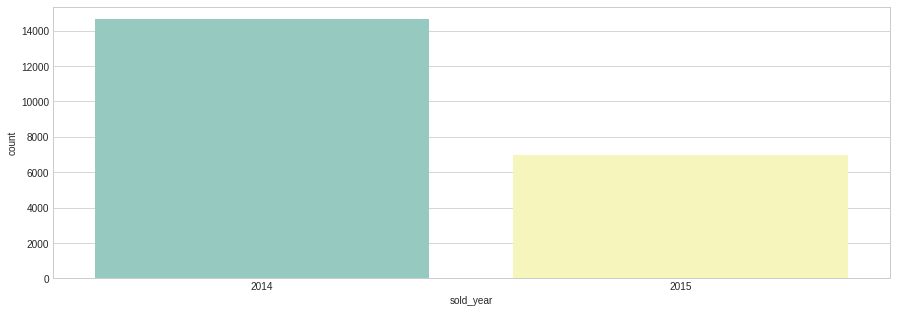

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(house['sold_year'], palette = 'Set3')
plt.show()

In [ ]:
house.stb.freq(['sold_year'], cum_cols = False)

# there are 68% houses sold in 2014 and 32% sold in 2015 in this dataset

,sold_year,count,percent
0,2014,14633,67.704622
1,2015,6980,32.295378


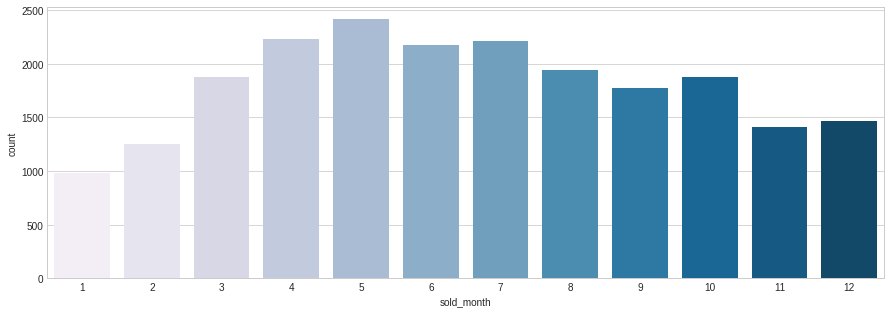

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(house['sold_month'], palette = 'PuBu')
plt.show()

In [ ]:
house.stb.freq(['sold_month'], cum_cols = False)

# we see that  11.2% houses sold in May
# and 10.3% sold in April and 10.2% sold in July

,sold_month,count,percent
0,5,2414,11.169204
1,4,2231,10.322491
2,7,2211,10.229954
3,6,2180,10.086522
4,8,1940,8.976079
5,10,1878,8.689215
6,3,1875,8.675334
7,9,1774,8.208023
8,12,1471,6.806089
9,11,1411,6.528478


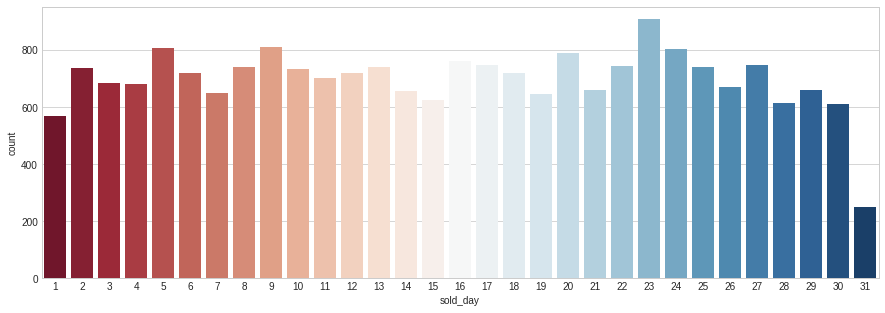

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(house['sold_day'], palette = 'RdBu')
plt.show()

In [ ]:
house.stb.freq(['sold_day'], cum_cols = False)

# most houses sold on day 23 and the least houses sold on day 31

,sold_day,count,percent
0,23,906,4.191922
1,9,808,3.738491
2,5,807,3.733864
3,24,801,3.706103
4,20,787,3.641327
5,16,759,3.511775
6,17,748,3.460880
7,27,745,3.446999
8,22,742,3.433119
9,13,741,3.428492


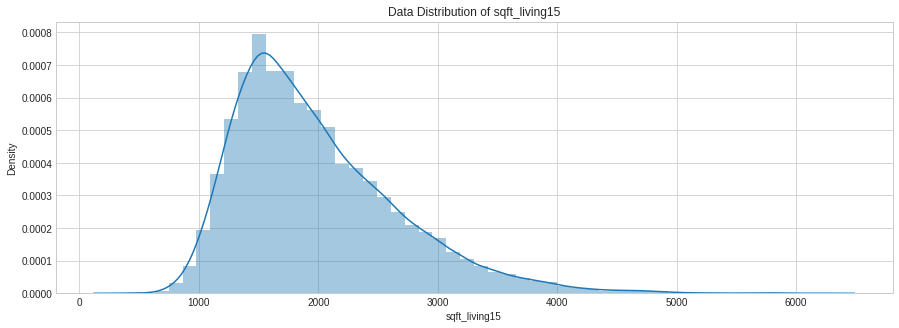

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(house['sqft_living15'])
plt.title("Data Distribution of sqft_living15")
plt.show()

# Data distribution of sqft_living15 columns is right skewed distribution

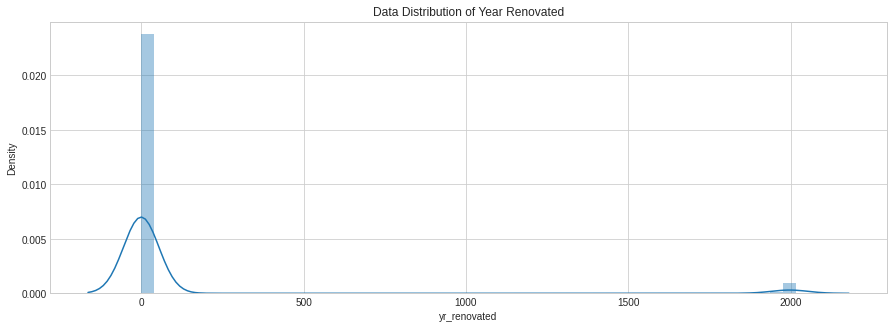

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(house['yr_renovated'])
plt.title("Data Distribution of Year Renovated")
plt.show()

In [ ]:
house.stb.freq(['yr_renovated'], cum_cols = False).head()
# 96% houses which sold are not renovated yet

,yr_renovated,count,percent
0,0,20699,95.771064
1,2014,91,0.421043
2,2013,37,0.171193
3,2003,36,0.166566
4,2007,35,0.161940


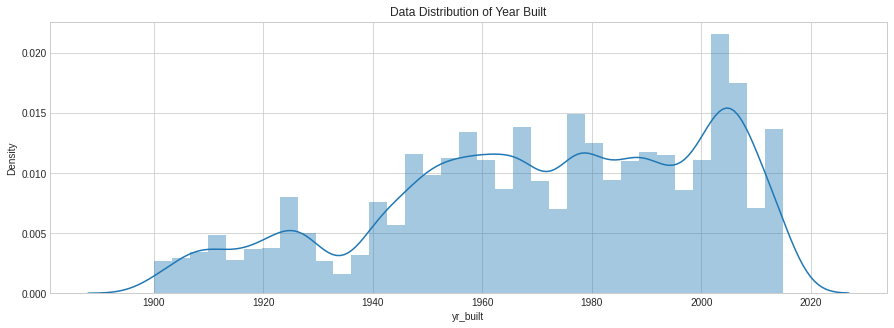

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(house['yr_built'])
plt.title("Data Distribution of Year Built")
plt.show()

In [ ]:
house.stb.freq(['yr_built'], cum_cols = False).head(10)

# Houses which built in 2000s are the top 10 hosue sales like 2003, 2004, 2005, 2006, and 2014.

,yr_built,count,percent
0,2014,559,2.586406
1,2006,454,2.100588
2,2005,450,2.082080
3,2004,433,2.003424
4,2003,422,1.952529
5,2007,417,1.929394
6,1977,417,1.929394
7,1978,387,1.790589
8,1968,381,1.762828
9,2008,367,1.698052


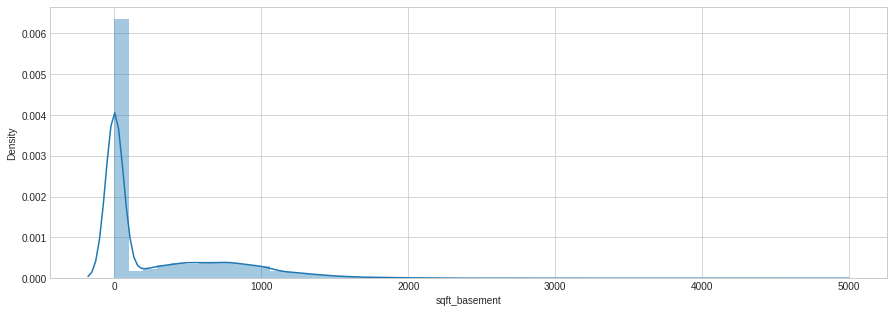

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(house['sqft_basement'])
plt.show()

In [ ]:
house.stb.freq(['sqft_basement'], cum_cols = False).head()

# 60.7% houses are sold without basement level

,sqft_basement,count,percent
0,0,13126,60.731967
1,600,221,1.022533
2,700,218,1.008652
3,500,214,0.990145
4,800,206,0.953130


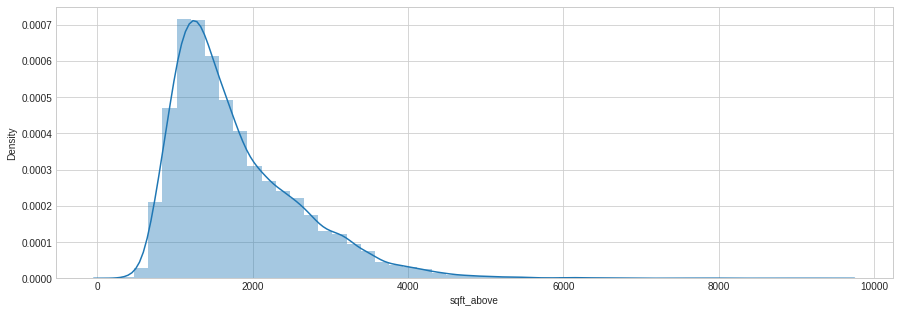

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(house['sqft_above'])
plt.show()

In [ ]:
house.stb.freq(['sqft_above'], cum_cols = False).head()

# average of above house's basement area is about 1788 ft2 or 166 m2
# we see that Top 5 of Above House's Basement area is 1300 ft2, 1010 ft2, 1200 ft2, 1220 ft2, and 1140 ft2.

,sqft_above,count,percent
0,1300,212,0.980891
1,1010,210,0.971637
2,1200,206,0.953130
3,1220,192,0.888354
4,1140,184,0.851339


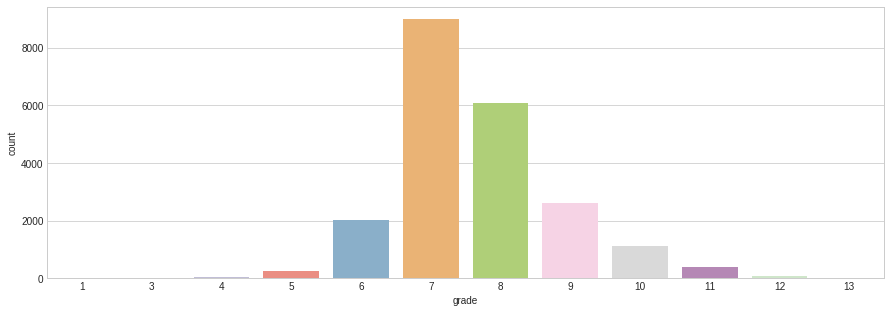

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(house['grade'], palette = 'Set3')
plt.show()

In [ ]:
house.stb.freq(['grade'], cum_cols = False)

# 42% houses sold by grade 7 out of 13 which means great enough, not perfect but not bad tho.

,grade,count,percent
0,7,8981,41.553695
1,8,6068,28.075695
2,9,2615,12.099200
3,6,2038,9.429510
4,10,1134,5.246842
5,11,399,1.846111
6,5,242,1.119696
7,12,90,0.416416
8,4,29,0.134179
9,13,13,0.060149


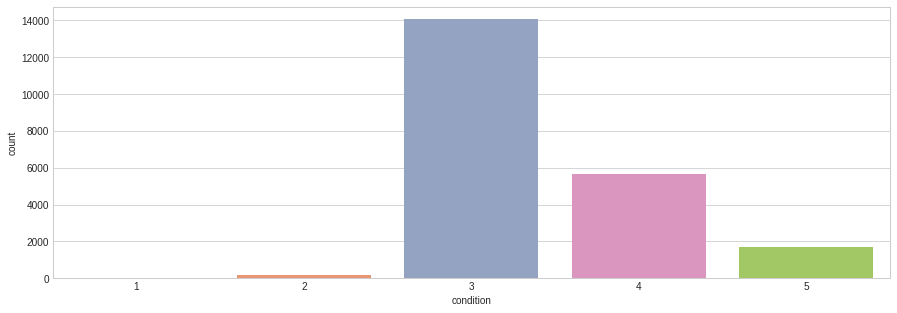

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(house['condition'], palette = 'Set2')
plt.show()

In [ ]:
house.stb.freq(['condition'], cum_cols = False)

# 65% houses were sold by good condition 3 of 5 points.

,condition,count,percent
0,3,14031,64.919262
1,4,5679,26.275852
2,5,1701,7.870263
3,2,172,0.795817
4,1,30,0.138805


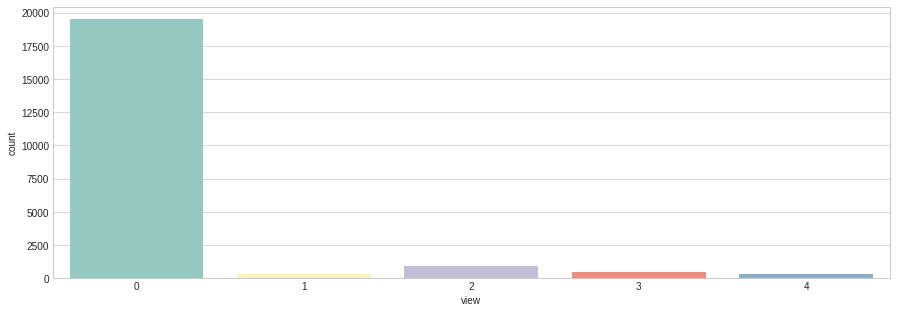

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(house['view'], palette = 'Set3')
plt.show()

In [ ]:
house.stb.freq(['view'], cum_cols = False)

# 90% property's view valued by 0 points are sold.

,view,count,percent
0,0,19489,90.172581
1,2,963,4.455652
2,3,510,2.359691
3,1,332,1.536113
4,4,319,1.475964


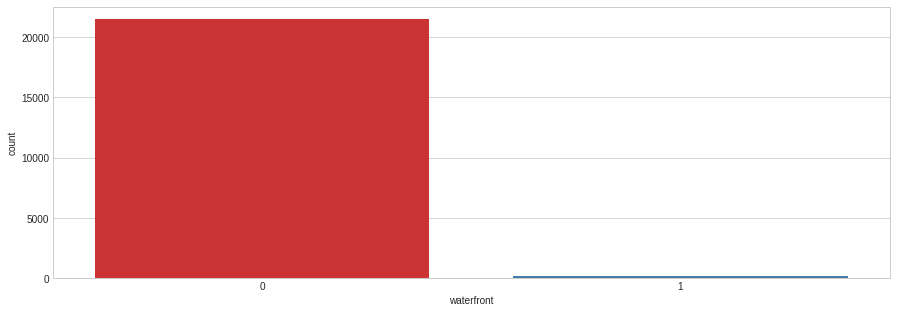

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(house['waterfront'], palette = 'Set1')
plt.show()

In [ ]:
house.stb.freq(['waterfront'], cum_cols = False)

# 99.2% apartment was overlooking the waterfront.

,waterfront,count,percent
0,0,21450,99.245824
1,1,163,0.754176


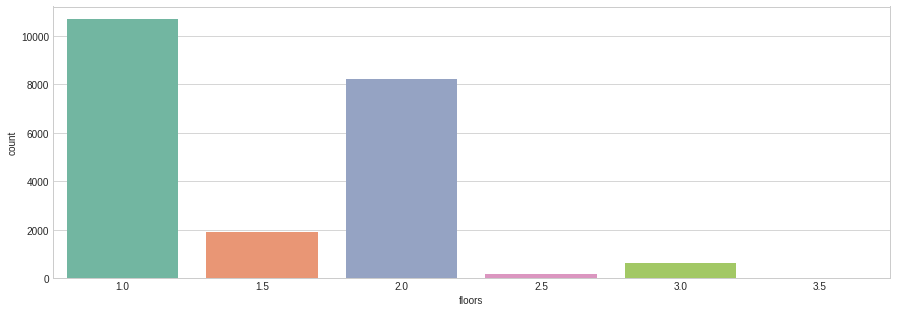

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(house['floors'], palette = 'Set2')
plt.show()

In [ ]:
house.stb.freq(['floors'], cum_cols = False)

# 49.4% 1 floor houses were sold;
# 38.1% 2 floor houses were sold;
# Most buyers seek house which have 1 floor or 2 floor level.

,floors,count,percent
0,1.0,10680,49.414704
1,2.0,8241,38.129829
2,1.5,1910,8.837274
3,3.0,613,2.836256
4,2.5,161,0.744922
5,3.5,8,0.037015


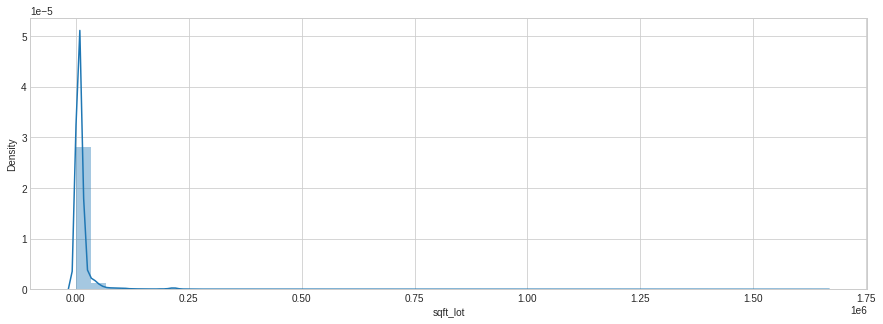

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(house['sqft_lot'])
plt.show()

In [ ]:
house.stb.freq(['sqft_lot'], cum_cols = False).head()

# The top 5 of Land Lot Area are 5000 ft2, 6000 ft2, 4000 ft2, 7200 ft2, and 4800 ft2

,sqft_lot,count,percent
0,5000,358,1.656410
1,6000,290,1.341785
2,4000,251,1.161338
3,7200,220,1.017906
4,4800,120,0.555221


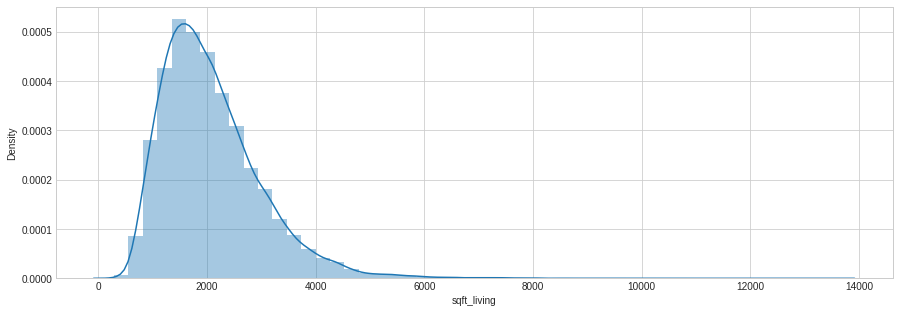

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(house['sqft_living'])
plt.show()

In [ ]:
house.stb.freq(['sqft_living'], cum_cols = False).head()

# Top 5 of apartments interior living space area are 1300 ft2, 1400 ft2, 1440 ft2, 1800 ft2, 1660 ft2

,sqft_living,count,percent
0,1300,138,0.638505
1,1400,135,0.624624
2,1440,133,0.615370
3,1800,129,0.596863
4,1660,129,0.596863


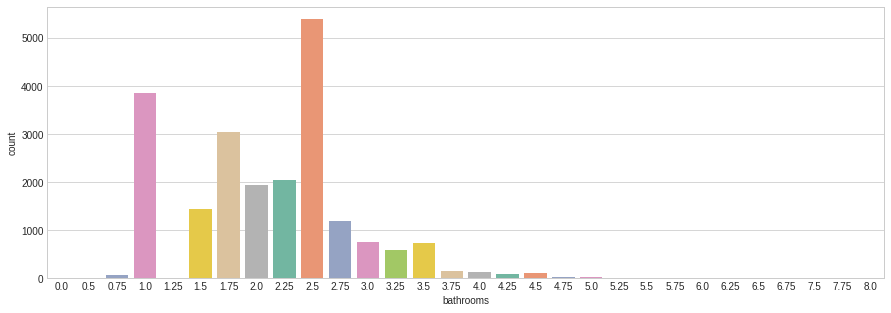

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(house['bathrooms'], palette = 'Set2')
plt.show()

In [ ]:
house.stb.freq(['bathrooms'], cum_cols = False).head(10)
# We see that most houses have 2.5 bathrooms with 25%.
# .5 accounts for bathroom with a toilet but no shower inside
# The second one, 18% houses have only 1 bathrooms.
# Most buyers prefer to choose whether house with 1, or 2 bathrooms.

,bathrooms,count,percent
0,2.50,5380,24.892426
1,1.00,3852,17.822607
2,1.75,3048,14.102623
3,2.25,2047,9.471152
4,2.00,1930,8.929811
5,1.50,1446,6.690418
6,2.75,1185,5.482811
7,3.00,753,3.484014
8,3.50,731,3.382224
9,3.25,589,2.725212


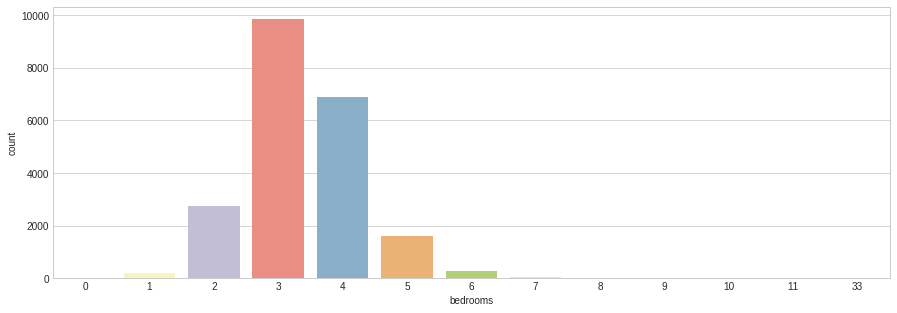

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(house['bedrooms'], palette = 'Set3')
plt.show()

In [ ]:
house.stb.freq(['bedrooms'], cum_cols = False)

# Most houses sold with 3 bedrooms and 4 bedrooms
# 46% houses sold with 3 bedrooms,
# 32% houses sold with 4 bedrooms,
# and 13% houses sold with 2 bedrooms.

# Most buyers prefer to choose whether house with 2, 3, or 4 bedrooms.
# it's interesting that we found that house with 33 bedrooms, is the house' area wide enough?

,bedrooms,count,percent
0,3,9824,45.454125
1,4,6882,31.841947
2,2,2760,12.770092
3,5,1601,7.407579
4,6,272,1.258502
5,1,199,0.920742
6,7,38,0.175820
7,8,13,0.060149
8,0,13,0.060149
9,9,6,0.027761


In [ ]:
house[house['bedrooms'] > 10]
# If this house is really has 33 bedrooms, why its house's area is only 1640 ft2 or about 152 m2?
# Imagine you have house with 33 bedrooms but its size only about 3-4 m2 per bedroom. That's not make any sense
# We can drop this row #15870.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_day,sold_month,sold_year
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,21,8,2014
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,25,6,2014


In [ ]:
house.drop(house[house['bedrooms'] == 33].index, inplace = True)
house[house['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_day,sold_month,sold_year
8757,1773100755,2014-08-21,520000.0,11,3.0,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960,21,8,2014


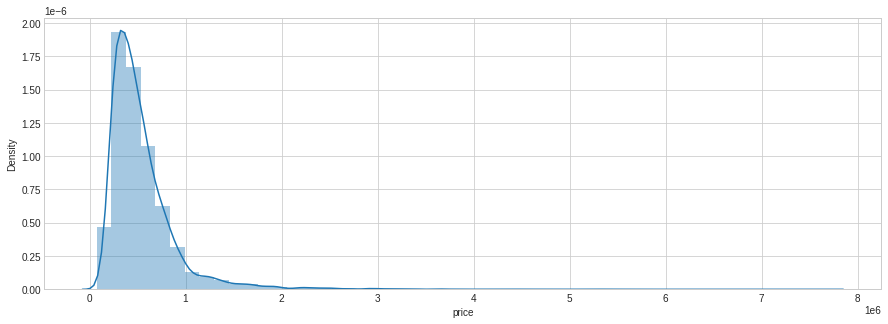

In [ ]:
plt.figure(figsize = (15,5))
sns.distplot(house['price'])
plt.show()

In [ ]:
house.stb.freq(['price'], cum_cols = False).head()
# average of house price is 540,088

,price,count,percent
0,450000.0,172,0.795854
1,350000.0,172,0.795854
2,550000.0,159,0.735702
3,500000.0,152,0.703313
4,425000.0,150,0.694059


## Price

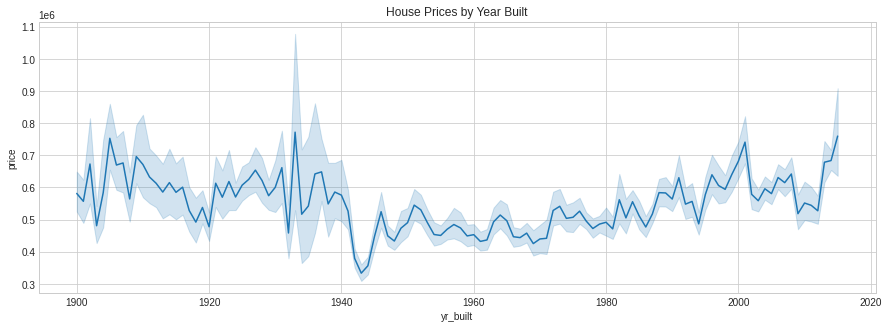

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data = house, x = 'yr_built', y = 'price')
plt.title('House Prices by Year Built')
plt.show()

In [ ]:
house.groupby('yr_built').mean()['price'].sort_values(ascending = False).to_frame().head()
# Highest Average of House Price along the year is in 1933 with $772,050 and 2015 $759,785.

,price
yr_built,
1933,772050.000000
2015,759785.157895
1905,752977.986486
2001,741030.796721
1909,696135.159574


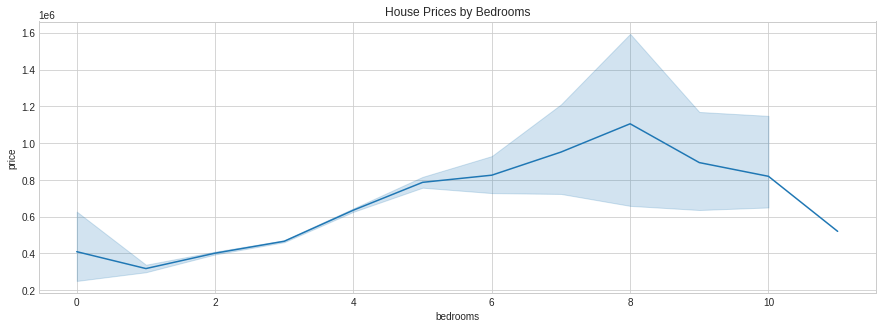

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data = house, x = 'bedrooms', y = 'price')
plt.title('House Prices by Bedrooms')
plt.show()

In [ ]:
house.groupby('bedrooms').mean()['price'].sort_values(ascending = True).to_frame().head(10)
# we see that most of houses with more bedrooms have a higher the price like 1 bedrooms until 8 bedrooms.

,price
bedrooms,
1,317642.884422
2,401372.681884
0,409503.846154
3,466232.078481
11,520000.000000
4,635419.504214
5,786599.828857
10,819333.333333
6,825520.636029


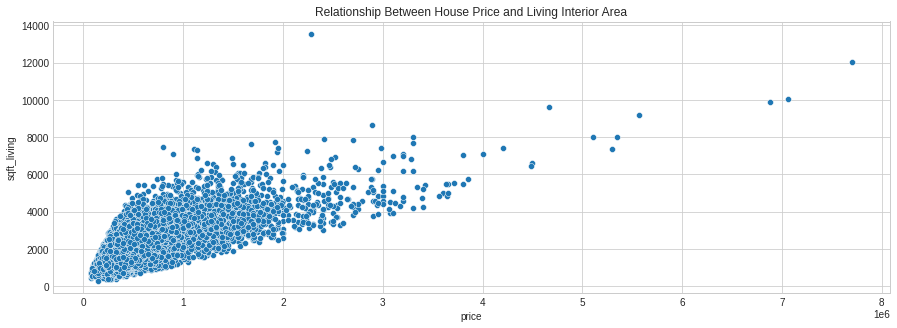

In [ ]:
plt.figure(figsize = (15,5))
sns.scatterplot(data = house, y = 'sqft_living', x = 'price')
plt.title('Relationship Between House Price and Living Interior Area')
plt.show()

In [ ]:
house.groupby('sqft_living').mean()['price'].sort_values(ascending = False).to_frame().head(10)
# we see that house price tend to cheaper when sqft_living is smaller.

,price
sqft_living,
12050,7700000.0
10040,7062500.0
9890,6885000.0
9200,5570000.0
8000,5350000.0
7390,5300000.0
8010,5110800.0
9640,4668000.0
6430,4489000.0


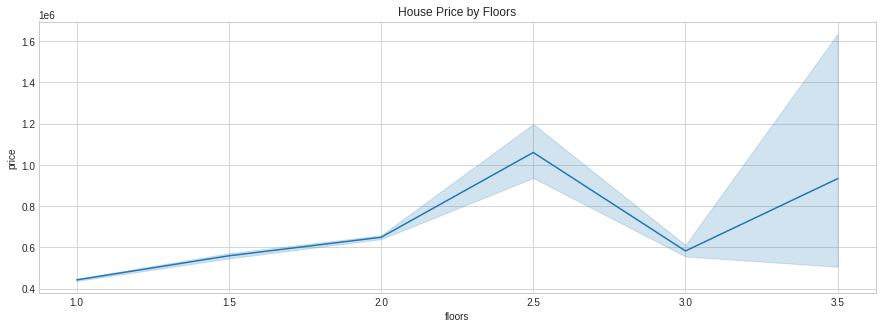

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data = house, x = 'floors', y = 'price')
plt.title('House Price by Floors')
plt.show() 

In [ ]:
house.groupby('floors').mean()['price'].sort_values(ascending = False).to_frame().head(10)
# The most expensive houses are house with 2.5 floors level with the average price is $1,060,346
# The cheapest houses are house with 1 floors level with the average price is $442,162

,price
floors,
2.5,1.060346e+06
3.5,9.333125e+05
2.0,6.488912e+05
3.0,5.825260e+05
1.5,5.589806e+05
1.0,4.421621e+05


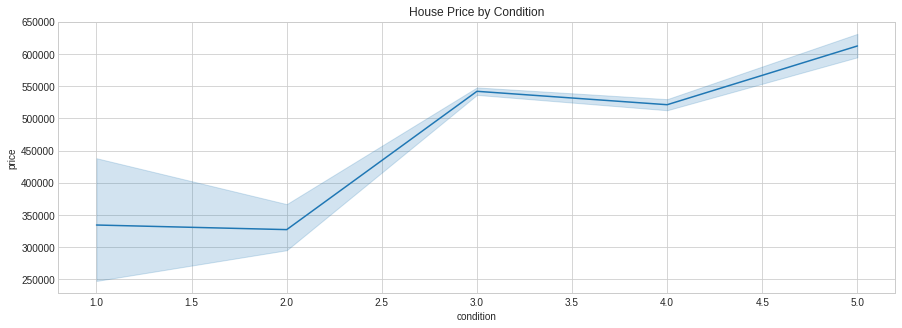

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data = house, x = 'condition', y = 'price')
plt.title('House Price by Condition')
plt.show() 

In [ ]:
house.groupby('condition').mean()['price'].sort_values(ascending = False).to_frame().head(10)
# we see that house price tend to go up when the condition is higher
# The average price of house with condition 5 is 612401.

,price
condition,
5,612401.864706
3,542012.578148
4,521200.390033
1,334431.666667
2,327287.145349


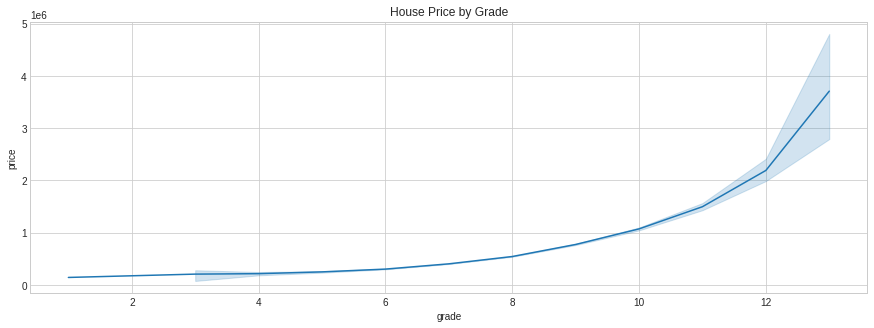

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data = house, x = 'grade', y = 'price')
plt.title('House Price by Grade')
plt.show() 

In [ ]:
house.groupby('grade').mean()['price'].sort_values(ascending = False).to_frame().head(10)
# Well this is obvious higher the construction and design, higher the price
# The average price of house with grade 13 is $3,709,615.
# if buyer wants to find a good grade like 7, they should prepare their money about $402,563.

,price
grade,
13,3.709615e+06
12,2.191222e+06
11,1.496842e+06
10,1.071771e+06
9,7.735132e+05
8,5.428528e+05
7,4.025638e+05
6,3.019196e+05
5,2.485240e+05


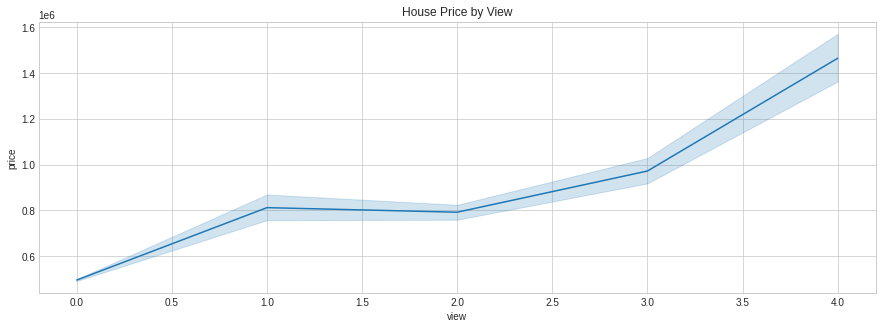

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data = house, x = 'view', y = 'price')
plt.title('House Price by View')
plt.show() 

In [ ]:
house.groupby('view').mean()['price'].sort_values(ascending = False).to_frame().head(10)
# It's really obvious too that higher the view point higher the price.
# The average price of house with perfect view is $1,463,711

,price
view,
4,1.463711e+06
3,9.719653e+05
1,8.122808e+05
2,7.924009e+05
0,4.965568e+05


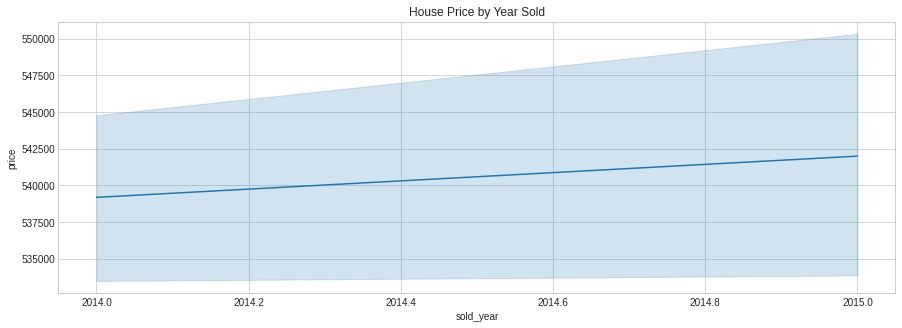

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data = house, x = 'sold_year', y = 'price')
plt.title('House Price by Year Sold')
plt.show()

In [ ]:
house.groupby('sold_year').mean()['price'].sort_values(ascending = False).to_frame().head(10)
# Between 2014 and 2015, house prices tend to up from 539174 to 541988.
# It may only 2 years but we see that house is a good investment for investor.

,price
sold_year,
2015,541988.992264
2014,539174.538136


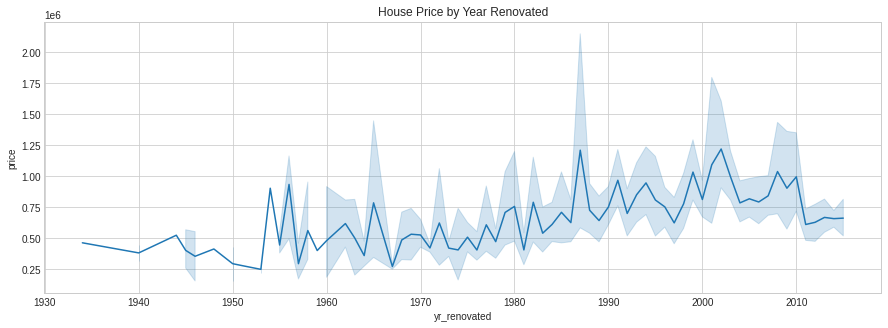

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data = house[house['yr_renovated'] != 0], x = 'yr_renovated', y = 'price')
plt.title('House Price by Year Renovated')
plt.show()

In [ ]:
house.groupby('yr_renovated').mean()['price'].sort_values(ascending = False).to_frame().head(10)
# Houses which already renovated has a highest price $1,216,316

,price
yr_renovated,
2002,1.216316e+06
1987,1.206778e+06
2001,1.089187e+06
2008,1.034499e+06
1999,1.030118e+06
2010,9.922250e+05
2003,9.914444e+05
1991,9.642950e+05
1994,9.429213e+05


# 8) Data Preprocessing

## Correlation

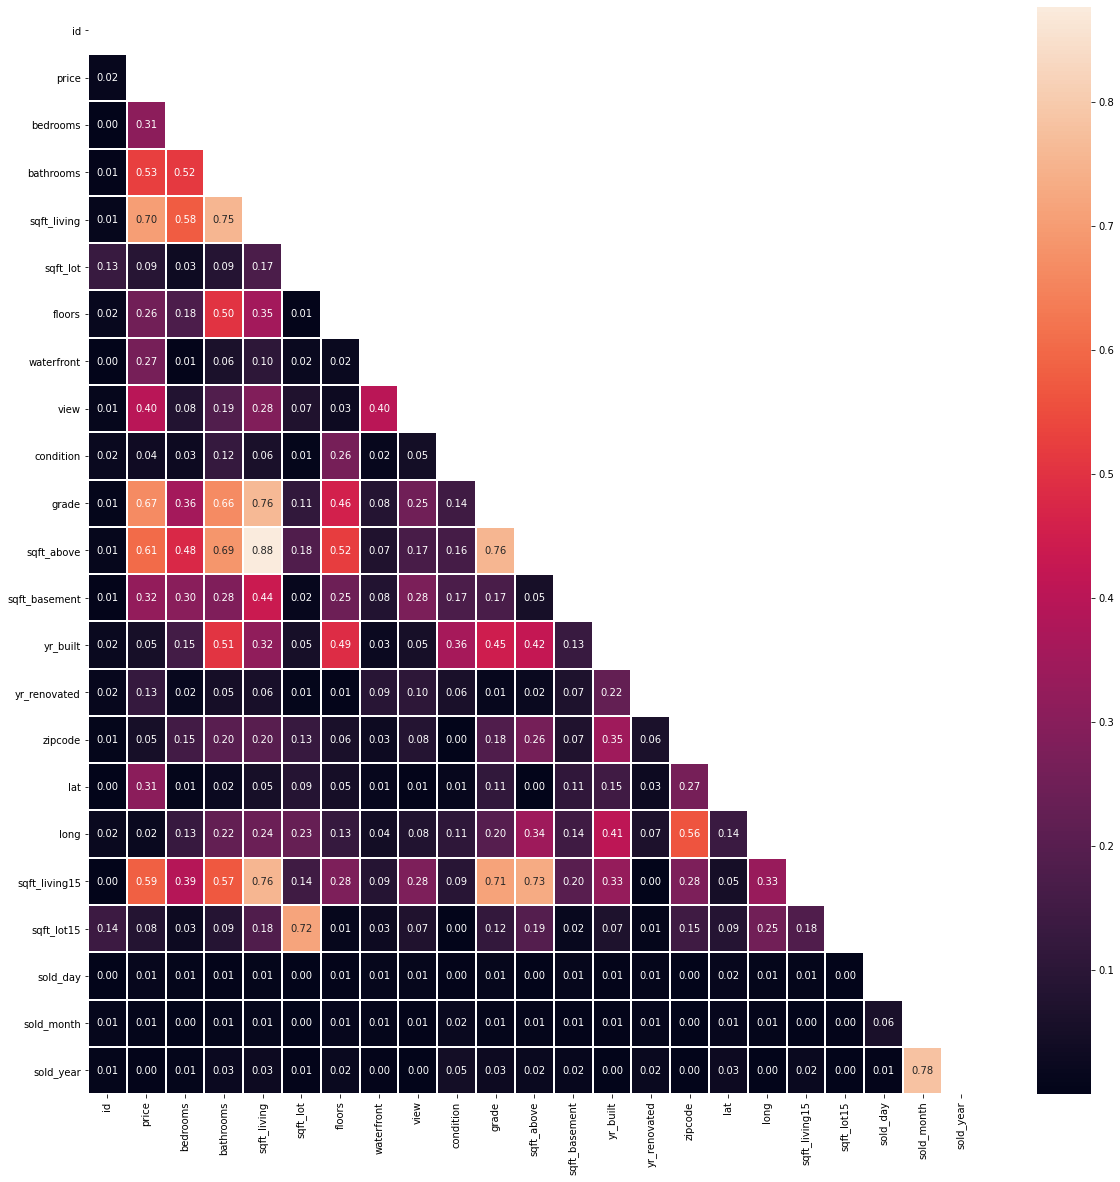

In [ ]:
corr = house.corr().abs()
mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True, linewidths = 1, mask = mask, fmt = '.2f')
plt.show()

# to drop list:
  # lat
  # long
  # zipcode
  # id
  # yr_renovated

## Feature Engineering & Selection

In [ ]:
# to drop list based on Correlation:
  # lat
  # long
  # zipcode
  # id
  # yr_renovated

house.drop(['id', 'date'], axis=1, inplace = True)
# house.drop(['id', 'lat', 'long','zipcode', 'yr_renovated'], axis=1, inplace = True)
# house.head()

# to drop list based on Coefficient:
  # sqft_living15, 
  # sqft_lot15, 
  # yr_renovated

## Scaling and Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X = house.drop('price', axis = 1)
y = house['price']

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_day,sold_month,sold_year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=88
                                                    )

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# X_train_sc & X_test_sc --> NON-TREE
# X_train & X_test --> TREE

# 9) Machine Learning Modelling

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error

## Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_lr = lr.predict(X_test_sc)

In [ ]:
r2_lr = r2_score(y_test, pred_lr)
mae_lr = mean_absolute_error(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr
# id and date | long, lat, zipcode | 'sqft_living15', 'sqft_lot15', 'yr_renovated'
# 0.70933 | 0.664 | 0.661

0.710583654472352

In [ ]:
# R2 Training
lr.score(X_train_sc, y_train)

0.6989021916707824

In [ ]:
mae_lr

125608.89373787816

In [ ]:
rmse_lr

# id and date | long, lat, zipcode | 'sqft_living15', 'sqft_lot15', 'yr_renovated'
# 196977.76 | 210942.041 | 211768.54

195656.13578334256

In [ ]:
lr_coef = dict(zip(X.columns, abs(lr.coef_)))
pd.DataFrame.from_dict(data = lr_coef, orient = 'index', columns=['Coef']).sort_values(by = 'Coef', ascending = False)

,Coef
grade,111757.027505
lat,84585.127394
sqft_living,83786.088616
sqft_above,79260.028376
yr_built,78620.864720
waterfront,50884.940347
view,40470.328650
bathrooms,33939.390908
bedrooms,33493.723548
zipcode,29751.348632


## Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
pred_dt = dt.predict(X_test)

In [ ]:
r2_dt = r2_score(y_test, pred_dt)
mae_dt = mean_absolute_error(y_test, pred_dt)
mse_dt = mean_squared_error(y_test, pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt

0.7422292334980567

In [ ]:
# R2 Training
dt.score(X_train, y_train)

1.0

## Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred_rf = rf.predict(X_test)

In [ ]:
r2_rf = r2_score(y_test, pred_rf)
mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf

0.886724503714149

In [ ]:
# R2 Training
rf.score(X_train, y_train)

0.9811180333355328

## Xtreme Gradient Boosting

In [ ]:
xg = GradientBoostingRegressor()

In [ ]:
xg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred_xg = xg.predict(X_test)

In [ ]:
r2_xg = r2_score(y_test, pred_xg)
mae_xg = mean_absolute_error(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_xg

0.8796558588050527

In [ ]:
# R2 Training
xg.score(X_train, y_train)

0.9019106597145486

## K Nearest Neighbors

In [ ]:
kn = KNeighborsRegressor()

In [ ]:
kn.fit(X_train_sc, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
pred_kn = kn.predict(X_test_sc)

In [ ]:
r2_kn = r2_score(y_test, pred_kn)
mae_kn = mean_absolute_error(y_test, pred_kn)
mse_kn = mean_squared_error(y_test, pred_kn)
rmse_kn = np.sqrt(mse_kn)
r2_kn

# Scaled | Unscaled
# 0.8044 | 0.52

0.7837981535094676

In [ ]:
# R2 Training
kn.score(X_train_sc, y_train)

0.8468553504931023

## Ridge

In [ ]:
ridg = Ridge()

In [ ]:
ridg.fit(X_train_sc, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
pred_ridg = ridg.predict(X_test_sc)

In [ ]:
r2_ridg = r2_score(y_test, pred_ridg)
mae_ridg = mean_absolute_error(y_test, pred_ridg)
mse_ridg = mean_squared_error(y_test, pred_ridg)
rmse_ridg = np.sqrt(mse_ridg)
r2_ridg

0.7105851511192529

In [ ]:
# R2 Training
ridg.score(X_train_sc, y_train)

0.6989021899307161

## Lasso

In [ ]:
ls = Lasso()

In [ ]:
ls.fit(X_train_sc, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
pred_ls = ls.predict(X_test_sc)

In [ ]:
r2_ls = r2_score(y_test, pred_ls)
mae_ls = mean_absolute_error(y_test, pred_ls)
mse_ls = mean_squared_error(y_test, pred_ls)
rmse_ls = np.sqrt(mse_ls)
r2_ls

0.7105830421131749

In [ ]:
# R2 Training
ls.score(X_train_sc, y_train)

0.6989021912858034

## ElasticNet

In [ ]:
en = ElasticNet()

In [ ]:
en.fit(X_train_sc, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
pred_en = en.predict(X_test_sc)

In [ ]:
r2_en = r2_score(y_test, pred_en)
mae_en = mean_absolute_error(y_test, pred_en)
mse_en = mean_squared_error(y_test, pred_en)
rmse_en = np.sqrt(mse_en)
r2_en

0.6827515026083655

In [ ]:
# R2 Training
en.score(X_train_sc, y_train)

0.666395438214183

In [ ]:
eva_mat = {
    "Linear Reg": [r2_lr, mae_lr, mse_lr, rmse_lr],
    "Ridge": [r2_ridg, mae_ridg, mse_ridg, rmse_ridg],
    "Lasso": [r2_ls, mae_ls, mse_ls, rmse_ls],
    "ElasticNet": [r2_en, mae_en, mse_en, rmse_en],
    "KNN": [r2_kn, mae_kn, mse_kn, rmse_kn],
    # "SVM": [r2_sv, mae_sv, mse_sv, rmse_sv],
    "DecisionTree": [r2_dt, mae_dt, mse_dt, rmse_dt],
    "RandomForest" : [r2_rf, mae_rf, mse_rf, rmse_rf],
    "XtremeGradientBoost": [r2_xg, mae_xg, mse_xg, rmse_xg]
    }

eva = pd.DataFrame(data = eva_mat, index = ['R2', 'MeanAbsoluteError', 'MeanSquaredError', 'RootMeanSquaredError'])
eva.T

,R2,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError
Linear Reg,0.710584,125608.893738,3.828132e+10,195656.135783
Ridge,0.710585,125606.456066,3.828113e+10,195655.629888
Lasso,0.710583,125608.719524,3.828140e+10,195656.342772
ElasticNet,0.682752,123787.964195,4.196270e+10,204848.001418
KNN,0.783798,97673.449271,2.859719e+10,169107.022788
DecisionTree,0.742229,103824.328244,3.409554e+10,184649.772000
RandomForest,0.886725,68765.256306,1.498304e+10,122405.217818
XtremeGradientBoost,0.879656,76389.336776,1.591801e+10,126166.605997


# 10) Optimization

## Ridge

In [ ]:
ridg_t = Ridge()

param_ridg = {
    "alpha" : [1, 2]
}

tuned_ridg = GridSearchCV(
    estimator = ridg_t,
    param_grid = param_ridg,
    cv = 10,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 1    
)

In [ ]:
tuned_ridg.fit(X_train_sc, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1, param_grid={'alpha': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

In [ ]:
tuned_ridg.best_params_

{'alpha': 2}

In [ ]:
pred_ridgt = tuned_ridg.predict(X_test_sc)

In [ ]:
r2_ridgt = r2_score(y_test, pred_ridgt)
mae_ridgt = mean_absolute_error(y_test, pred_ridgt)
mse_ridgt = mean_squared_error(y_test, pred_ridgt)
rmse_ridgt = np.sqrt(mse_ridgt)
r2_ridgt

0.7105866436501409

In [ ]:
# R2 Training
r2_score(y_train, tuned_ridg.predict(X_train_sc))

0.6989021847127606

In [ ]:
tuned_ridg.best_score_

0.6955331188196848

## Lasso

In [ ]:
ls_t = Lasso()

param_ls = {
    "alpha" : [1, 2]
}

tuned_ls = GridSearchCV(
    estimator = ls_t,
    param_grid = param_ls,
    cv = 5,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 1    
)

In [ ]:
tuned_ls.fit(X_train_sc, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1, param_grid={'alpha': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

In [ ]:
tuned_ls.best_params_

{'alpha': 1}

In [ ]:
pred_lst = tuned_ls.predict(X_test_sc)

In [ ]:
r2_lst = r2_score(y_test, pred_lst)
mae_lst = mean_absolute_error(y_test, pred_lst)
mse_lst = mean_squared_error(y_test, pred_lst)
rmse_lst = np.sqrt(mse_lst)
r2_lst

0.7105830421131749

In [ ]:
# R2 Training
r2_score(y_train, tuned_ls.predict(X_train_sc))

0.6989021912858034

In [ ]:
tuned_ls.best_score_

0.6940177154149854

## ElasticNet

In [ ]:
en_t = ElasticNet()

param_en = {
    "l1_ratio" : [0, 0.5, 1],
    "max_iter" : [1000, 5000]
}

tuned_en = GridSearchCV(
    estimator = en_t,
    param_grid = param_en,
    cv = 5,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 1    
)

In [ ]:
tuned_en.fit(X_train_sc, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'l1_ratio': [0, 0.5, 1], 'max_iter': [1000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

In [ ]:
tuned_en.best_params_

{'l1_ratio': 1, 'max_iter': 5000}

In [ ]:
pred_ent = tuned_en.predict(X_test_sc)

In [ ]:
r2_ent = r2_score(y_test, pred_ent)
mae_ent = mean_absolute_error(y_test, pred_ent)
mse_ent = mean_squared_error(y_test, pred_ent)
rmse_ent = np.sqrt(mse_ent)
r2_ent

0.7105830421131751

In [ ]:
# R2 Training
r2_score(y_train, tuned_en.predict(X_train_sc))

0.6989021912858034

In [ ]:
tuned_en.best_score_

0.6940177154149855

## Decision Tree Regressor

In [ ]:
dt_t = DecisionTreeRegressor()

param_dt = {
    "criterion" : ['mse', 'mae', 'friendman_mse'],
    "max_depth" : [None, 28, 30, 32, 34],
    "min_samples_split" : [2,1,8],
    "min_samples_leaf"  : [1,3,10,15],
    "max_features" : [None, 'sqrt', 'log2']
}

tuned_dt = RandomizedSearchCV(
    estimator = dt_t,
    param_distributions = param_dt,
    cv = 5,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 1    
)

In [ ]:
tuned_dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
tuned_dt.best_params_

# 0.77 tr vs 0.79 ts
# {'criterion': 'mse',
#  'max_depth': 35,
#  'max_features': None,
#  'min_samples_leaf': 10,
#  'min_samples_split': 2}

# 0.763 tr vs 0.772 ts
# {'criterion': 'mae',
#  'max_depth': 35,
#  'max_features': None,
#  'min_samples_leaf': 15,
#  'min_samples_split': 8}

# 0.762 ts | 0.762 ts
# {'criterion': 'mae',
#  'max_depth': 33,
#  'max_features': None,
#  'min_samples_leaf': 10,
#  'min_samples_split': 2}

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

In [ ]:
pred_dtt = tuned_dt.predict(X_test)

In [ ]:
r2_dtt = r2_score(y_test, pred_dtt)
mae_dtt = mean_absolute_error(y_test, pred_dtt)
mse_dtt = mean_squared_error(y_test, pred_dtt)
rmse_dtt = np.sqrt(mse_dtt)
r2_dtt

0.7820292975175609

In [ ]:
tuned_dt.best_score_

0.7611891382879549

## Random Forest Regressor

In [ ]:
rf_t = RandomForestRegressor()

param_rf = {
    "n_estimators": [100, 150, 350, 500, 750],
    "max_depth" : [None, 10, 55, 85],
    "min_samples_split" : [2,1,8],
    "min_samples_leaf"  : [1,3,10,15],
    "max_features" : [None, 'sqrt', 'log2']
}

tuned_rf = RandomizedSearchCV(
    estimator = rf_t,
    param_distributions = param_rf,
    cv = 5,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 1    
)

In [ ]:
tuned_rf.fit(X_train, y_train) 
# 12.40 - 12.44 cv = 10

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
tuned_rf.best_params_

# 0.82 tr vs 0.87 ts
  # {'max_depth': 10,
  #  'max_features': None,
  #  'min_samples_leaf': 1,
  #  'min_samples_split': 2,
  #  'n_estimators': 150}

# 0.86 tr vs 0.88 ts
  # {'max_depth': 85,
  #  'max_features': None,
  #  'min_samples_leaf': 1,
  #  'min_samples_split': 2,
  #  'n_estimators': 100}

# 0.87 tr vs 0.89 ts
# {'max_depth': 55,
#  'max_features': None,
#  'min_samples_leaf': 1,
#  'min_samples_split': 8,
#  'n_estimators': 100}

# 0.87 tr vs 0.89 ts
  # {'max_depth': 85,
  #  'max_features': None,
  #  'min_samples_leaf': 1,
  #  'min_samples_split': 2,
  #  'n_estimators': 750}

{'max_depth': 85,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 750}

In [ ]:
pred_rft = tuned_rf.predict(X_test)

In [ ]:
tuned_rf.best_score_

0.8666671180551184

In [ ]:
r2_rft = r2_score(y_test, pred_rft)
mae_rft = mean_absolute_error(y_test, pred_rft)
mse_rft = mean_squared_error(y_test, pred_rft)
rmse_rft = np.sqrt(mse_rft)
r2_rft

0.888166118437826

## Xtreme Gradient Boosting

In [ ]:
xg_t = GradientBoostingRegressor()

param_xg = {
    "n_estimators" : [100, 500, 1000],
    "learning_rate" : [0.1, 0.01, 0.001],
    "subsample" : [0.1, 0.5, 0.01],
    "criterion"  : ['friedman_mse', 'mse', 'mae'],
    "min_samples_split" : [2, 8, 10],
    "min_samples_leaf" : [1, 15, 10],
    "max_depth" : [3, 10, 30],
    "max_features" : ['sqrt', 'log2']
}

tuned_xg = RandomizedSearchCV(
    estimator = xg_t,
    param_distributions = param_xg,
    cv = 2,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 1    
)

In [ ]:
tuned_xg.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   59.3s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [ ]:
tuned_xg.best_params_

# 0.84 tr vs. 0.89 ts
# {'criterion': 'mse',
#  'learning_rate': 0.1,
#  'max_depth': 10,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 10,
#  'min_samples_split': 2,
#  'n_estimators': 1000,
#  'subsample': 0.5}

{'criterion': 'mse',
 'learning_rate': 0.1,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'subsample': 0.5}

In [ ]:
pred_xgt = tuned_xg.predict(X_test)

In [ ]:
r2_xgt = r2_score(y_test, pred_xgt)
mae_xgt = mean_absolute_error(y_test, pred_xgt)
mse_xgt = mean_squared_error(y_test, pred_xgt)
rmse_xgt = np.sqrt(mse_xgt)
r2_xgt

0.8886601215479785

In [ ]:
tuned_xg.best_score_

0.8431642299159492

## K Nearest Neighbors

In [ ]:
kn_t = KNeighborsRegressor()

param_kn = {
    "n_neighbors" : [5, 3, 15, 25],
    "weights" : ['uniform', 'distance'],
    "p" : [1,2]
}

tuned_kn = RandomizedSearchCV(
    estimator = kn_t,
    param_distributions = param_kn,
    cv = 2,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 1    
)

In [ ]:
tuned_kn.fit(X_train_sc, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   53.9s finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 3, 15, 25],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='r2', verbose=1)

In [ ]:
tuned_kn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [ ]:
pred_knt = tuned_kn.predict(X_test_sc)

In [ ]:
r2_knt = r2_score(y_test, pred_knt)
mae_knt = mean_absolute_error(y_test, pred_knt)
mse_knt = mean_squared_error(y_test, pred_knt)
rmse_knt = np.sqrt(mse_knt)
r2_knt

# Scaled | Unscaled
# 0.8044 | 0.52

0.8019686421531701

In [ ]:
# R2 Training
tuned_kn.best_score_

0.7603438143622718

In [ ]:
eva_mat_tuned = {
    # "Linear Reg": [r2_lrt, mae_lrt, mse_lrt, rmse_lrt],
    "Ridge": [r2_ridgt, mae_ridgt, mse_ridgt, rmse_ridgt],
    "Lasso": [r2_lst, mae_lst, mse_lst, rmse_lst],
    "ElasticNet": [r2_ent, mae_ent, mse_ent, rmse_ent],
    "KNN": [r2_knt, mae_knt, mse_knt, rmse_knt],
    # "SVM": [r2_svt, mae_svt, mse_svt, rmse_svt],
    "DecisionTree": [r2_dtt, mae_dtt, mse_dtt, rmse_dtt],
    "RandomForest" : [r2_rft, mae_rft, mse_rft, rmse_rft],
    "XtremeGradientBoost": [r2_xgt, mae_xgt, mse_xgt, rmse_xgt]
    }

eva_tuned = pd.DataFrame(data = eva_mat_tuned, index = ['R2', 'MeanAbsoluteError', 'MeanSquaredError', 'RootMeanSquaredError'])
eva_tuned.T

,R2,MeanAbsoluteError,MeanSquaredError,RootMeanSquaredError
Ridge,0.710587,125604.018908,3.828093e+10,195655.125383
Lasso,0.710583,125608.719524,3.828140e+10,195656.342772
ElasticNet,0.710583,125608.719524,3.828140e+10,195656.342772
KNN,0.801969,89983.794615,2.619376e+10,161844.865827
DecisionTree,0.782029,92159.234903,2.883115e+10,169797.388389
RandomForest,0.872515,75893.347404,1.686252e+10,129855.760910
XtremeGradientBoost,0.888660,67246.850040,1.472701e+10,121354.899711


# 11) Conclusion
1. **Average of house price** is 540,088 from range 75,000 until 7,700,000 .
2. **Obvious factors that makes house price either high or low** are area bedrooms, living space area, floors, condition, grade, and property's view.
3. **Most houses sold with 3 bedrooms and 4 bedrooms**. 46% houses sold with 3 bedrooms, 32% houses sold with 4 bedrooms, and 13% houses sold with 2 bedrooms.
4. **Most houses have 2 bathrooms without shower inside** with 25%. The second one, 18% houses have only 1 bathrooms. Most buyers prefer to choose whether house with 1, or 2 bathrooms.
5. **42% houses sold by grade 7** out of 13 which means great enough, not perfect but not bad tho.
6. **60.7% houses are sold without basement level.**
7. **Houses which built in 2000s are the top 10 house sales** like 2003, 2004, 2005, 2006, and 2014.
8. **65% houses were sold by good condition 3** of 5 points.
9. **90% property's view valued by 0 points were sold.**
10. **The house price tend to be cheaper when sqft_living is smaller.**

#12) Recommendation
1. As a property investor, we could prepare up the money minimum 540,888 to have a not so bad property.
2. Keep in mind that there are important things to be focused on before you buy or invest in property like number of bedrooms, area of living space, number of floors, condition, grade, and property's view. Without basement it's okay though because 60.7% houses are sold without basement level.
3. If you may, find house with 3 or 4 bedrooms to increase your chance when you want to sell your property.
4. Find a house that has grade 7 out of 13. This means you won't waste your money too much because most buyers tend to find a great house to live not to show off.
5. Find the house which has condition score 3. It's enough because there's a lot of market who buy house with that condition.
6. Nevermind the property's view, because 90% property's view valued by 0 were sold.
7. We could offer some Machine Learning model to predict the house price. Our ML model can predict with its accuracy 89%. You can find some good houses with the best price and the best specification without worry.